# Stochastic Gradient Descent Using Linear Regression and the HealthInCities Dataset

### Importing/Preparing Data

In [205]:
import pandas as pd
import numpy as np
import random

health_cities_raw = pd.read_csv("HealthInCities.csv")

#Standardize data
for column in health_cities_raw:
    col_mean = np.mean(health_cities_raw[column])
    col_stdev = np.std(health_cities_raw[column])
    health_cities_raw[column] = (health_cities_raw[column] - col_mean)/col_stdev
    
#Adding a column of ones to generate an intercept feature i.e. y = mx + b, b will be the intercept
health_cities_raw["normalized_ones"] = 0

#DeathRate = DoctorAvailability*w0 + Hospital Availability*w1 + ... + 1*w5

training_data = health_cities_raw.sample(frac=0.5, replace=True)
test_data = health_cities_raw.sample(frac=0.5, replace=True)

#Selecting DeathRate as our Y dependent variable (as ndarray)
Y_train = training_data.iloc[:, 0].values

#Selecting the rest of the features, for now we just select the DoctorAvailability and normalized_ones 
#as our indepedent variables (as ndarray) for plotting purposes
X_train = training_data[['DoctorAvailability','normalized_ones']].values

#DeathRate = DoctorAvailability*w0 + w1
#Test Data
Y_test = test_data.iloc[:, 0].values
X_test = test_data[['DoctorAvailability','normalized_ones']].values

#Note: we use numpy ndarrays here because they allow us to do quick, efficient matrix computations in the gradient descent step


### Gradient Descent  - Doctors Availability

In [184]:
#Note that Linear Regression does have a closed form solution for w (meaning we can just solve for it
#without having to iterate)
#However, we want to show that almost any Machine Learning problem can be solved by Gradient Descent (iteration process)
#Regardless of whether it has a closed form solution or not, but in practice we will use this if it does not have a
#closed form solution or the closed form solution is too computationally demanding

#Randomly generated weights for our Linear model
w = np.array([random.random() for x in range(X_train.shape[1])])
iter_error = 0
error = 100000000000000
tolerance = 0.00001
iteration = 0
samples = X_train.shape[0]
epochs = 8

for e in range(epochs):
    
    train_data_sample = training_data.sample(frac=0.5, replace=True)
    X_train_sample = train_data_sample[['DoctorAvailability','normalized_ones']].values  
    Y_train_sample = train_data_sample.iloc[:, 0].values

    
    while abs(iter_error - error) > tolerance:
        iteration = iteration + 1
        error = iter_error

    
    #w_errors = 1/n*(X^T * (X*w - Y))
    #1/n used here to better select the step size (eta) by normalizing (X^T * (X*w - Y)) by the number of samples
        w_errors = 1/samples*(np.dot(X_train_sample.transpose(), np.dot(X_train_sample , w) - Y_train_sample))
        iter_error = sum([w**2 for w in w_errors])
    
    
    #search for good eta value which decreases the error for this iteration (to guarantee convergence)
        search_iter = 0
        eta_error = iter_error
        eta_rate = 0.00000000000000000000000000001
        w_test = w
        while eta_error >= iter_error:
            seach_iter = search_iter + 1
            eta_rate = eta_rate * 10
            w_test = w_test - eta_rate*eta_error
            eta_errors = 1/samples*(np.dot(X_train_sample.transpose(), np.dot(X_train_sample , w_test) - Y_train_sample))
            eta_error = sum([w**2 for w in eta_errors])
            if search_iter == 50:
                print("takes too long to converge, reconsider your problem formulation")
                break
    
    #Gradient step: found optimal eta rate so now we step in that direction of w parameter convergence
        w = w - eta_rate*w_errors

    #percaution to not allow our algorithm to run forever
        if iteration == 10000:
            break

### Plotting Results Against Training Set

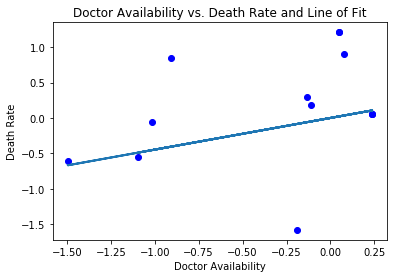

In [185]:
import matplotlib.pyplot as plt

train_prediction = [sum(X_train_sample[i] * w) for i in range(X_train_sample.shape[0])]

#Plotting our points and line of fit (model) 
plt.plot(train_data_sample['DoctorAvailability'], Y_train_sample, 'bo')
plt.plot(train_data_sample['DoctorAvailability'], train_prediction, linewidth=2)
plt.title("Doctor Availability vs. Death Rate and Line of Fit")
plt.xlabel("Doctor Availability")
plt.ylabel("Death Rate")
plt.show()

### Plotting Results Against Test Set

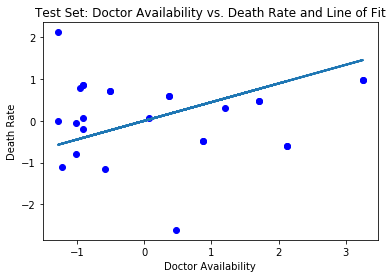

In [186]:
import matplotlib.pyplot as plt

test_prediction = [sum(X_test[i] * w) for i in range(X_test.shape[0])]

#Plotting our points and line of fit (model) 
plt.plot(test_data['DoctorAvailability'], Y_test, 'bo')
plt.plot(test_data['DoctorAvailability'], test_prediction, linewidth=2)
plt.title("Test Set: Doctor Availability vs. Death Rate and Line of Fit")
plt.xlabel("Doctor Availability")
plt.ylabel("Death Rate")
plt.show()

In [187]:
print(w)

[0.44754277 0.24261776]


### Cross Validation Performance Results, no Regularization

In [188]:
print("Training sum of squared errors, no regularization:", sum([res**2 for res in Y_train_sample-train_prediction]))
print("Test sum of squared errors, no regularization:", sum([res**2 for res in Y_test-test_prediction]))

Training sum of squared errors, no regularization: 7.74829804175851
Test sum of squared errors, no regularization: 31.167583484776905


In [204]:
#print("Interpretation : Using the Stochastic gradient method, we observe a lower sum of squared errors for both Training 
      #8% for stochastic as compared to 38% for vanilla and Test - 31% in stochastic as compared to 41% in vanilla). The weights 
      #for vanilla are 0.825 and .066 and for stochastic are 0.45 and 0.24")
     

### Stochastic Gradient Descent  -  HospitalAvailability

In [189]:
import pandas as pd
import numpy as np
import random

health_cities_raw = pd.read_csv("HealthInCities.csv")
#Standardize data
for column in health_cities_raw:
    col_mean = np.mean(health_cities_raw[column])
    col_stdev = np.std(health_cities_raw[column])
    health_cities_raw[column] = (health_cities_raw[column] - col_mean)/col_stdev
    
#Adding a column of ones to generate an intercept feature i.e. y = mx + b, b will be the intercept
health_cities_raw["normalized_ones"] = 0

#DeathRate = DoctorAvailability*w0 + Hospital Availability*w1 + ... + 1*w5

training_data = health_cities_raw.sample(frac=0.5, replace=True)
test_data = health_cities_raw.sample(frac=0.5, replace=True)

#Selecting DeathRate as our Y dependent variable (as ndarray)
Y_train = training_data.iloc[:, 0].values

#Selecting the rest of the features, for now we just select the DoctorAvailability and normalized_ones 
#as our indepedent variables (as ndarray) for plotting purposes
X_train = training_data[['HospitalAvailability','normalized_ones']].values

#DeathRate = DoctorAvailability*w0 + w1
#Test Data
Y_test = test_data.iloc[:, 0].values
X_test = test_data[['HospitalAvailability','normalized_ones']].values

#Note: we use numpy ndarrays here because they allow us to do quick, efficient matrix computations in the gradient descent step


In [190]:
#Note that Linear Regression does have a closed form solution for w (meaning we can just solve for it
#without having to iterate)
#However, we want to show that almost any Machine Learning problem can be solved by Gradient Descent (iteration process)
#Regardless of whether it has a closed form solution or not, but in practice we will use this if it does not have a
#closed form solution or the closed form solution is too computationally demanding

#Randomly generated weights for our Linear model
w = np.array([random.random() for x in range(X_train.shape[1])])
iter_error = 0
error = 100000000000000
tolerance = 0.00001
iteration = 0
samples = X_train.shape[0]
epochs = 8

for e in range(epochs):
    
    train_data_sample = training_data.sample(frac=0.5, replace=True)
    X_train_sample = train_data_sample[['HospitalAvailability','normalized_ones']].values  
    Y_train_sample = train_data_sample.iloc[:, 0].values

    
    while abs(iter_error - error) > tolerance:
        iteration = iteration + 1
        error = iter_error

    
    #w_errors = 1/n*(X^T * (X*w - Y))
    #1/n used here to better select the step size (eta) by normalizing (X^T * (X*w - Y)) by the number of samples
        w_errors = 1/samples*(np.dot(X_train_sample.transpose(), np.dot(X_train_sample , w) - Y_train_sample))
        iter_error = sum([w**2 for w in w_errors])
    
    
    #search for good eta value which decreases the error for this iteration (to guarantee convergence)
        search_iter = 0
        eta_error = iter_error
        eta_rate = 0.00000000000000000000000000001
        w_test = w
        while eta_error >= iter_error:
            seach_iter = search_iter + 1
            eta_rate = eta_rate * 10
            w_test = w_test - eta_rate*eta_error
            eta_errors = 1/samples*(np.dot(X_train_sample.transpose(), np.dot(X_train_sample , w_test) - Y_train_sample))
            eta_error = sum([w**2 for w in eta_errors])
            if search_iter == 50:
                print("takes too long to converge, reconsider your problem formulation")
                break
    
    #Gradient step: found optimal eta rate so now we step in that direction of w parameter convergence
        w = w - eta_rate*w_errors

    #percaution to not allow our algorithm to run forever
        if iteration == 10000:
            break

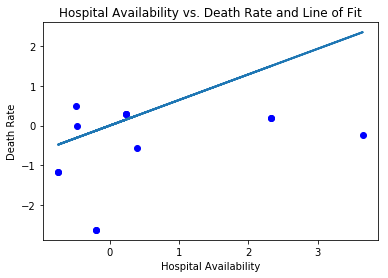

In [191]:
import matplotlib.pyplot as plt

train_prediction = [sum(X_train_sample[i] * w) for i in range(X_train_sample.shape[0])]

#Plotting our points and line of fit (model) 
plt.plot(train_data_sample['HospitalAvailability'], Y_train_sample, 'bo')
plt.plot(train_data_sample['HospitalAvailability'], train_prediction, linewidth=2)
plt.title("Hospital Availability vs. Death Rate and Line of Fit")
plt.xlabel("Hospital Availability")
plt.ylabel("Death Rate")
plt.show()

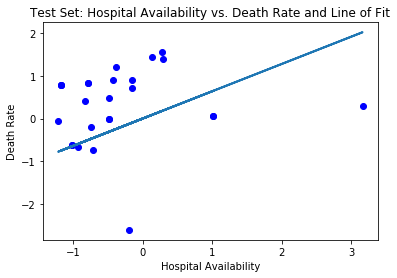

In [192]:
import matplotlib.pyplot as plt

test_prediction = [sum(X_test[i] * w) for i in range(X_test.shape[0])]

#Plotting our points and line of fit (model) 
plt.plot(test_data['HospitalAvailability'], Y_test, 'bo')
plt.plot(test_data['HospitalAvailability'], test_prediction, linewidth=2)
plt.title("Test Set: Hospital Availability vs. Death Rate and Line of Fit")
plt.xlabel("Hospital Availability")
plt.ylabel("Death Rate")
plt.show()

In [193]:
print(w)

[0.64121754 0.29353222]


In [194]:
print("Training sum of squared errors, no regularization:", sum([res**2 for res in Y_train_sample-train_prediction]))
print("Test sum of squared errors, no regularization:", sum([res**2 for res in Y_test-test_prediction]))

Training sum of squared errors, no regularization: 24.87931374132098
Test sum of squared errors, no regularization: 33.48894593187492


### Stochastic Gradient Descent  -  IncomePerCapita

In [195]:
import pandas as pd
import numpy as np
import random

health_cities_raw = pd.read_csv("HealthInCities.csv")
#Standardize data
for column in health_cities_raw:
    col_mean = np.mean(health_cities_raw[column])
    col_stdev = np.std(health_cities_raw[column])
    health_cities_raw[column] = (health_cities_raw[column] - col_mean)/col_stdev
    
#Adding a column of ones to generate an intercept feature i.e. y = mx + b, b will be the intercept
health_cities_raw["normalized_ones"] = 0

#DeathRate = DoctorAvailability*w0 + Hospital Availability*w1 + ... + 1*w5

training_data = health_cities_raw.sample(frac=0.5, replace=True)
test_data = health_cities_raw.sample(frac=0.5, replace=True)

#Selecting DeathRate as our Y dependent variable (as ndarray)
Y_train = training_data.iloc[:, 0].values

#Selecting the rest of the features, for now we just select the DoctorAvailability and normalized_ones 
#as our indepedent variables (as ndarray) for plotting purposes
X_train = training_data[['IncomePerCapita','normalized_ones']].values

#DeathRate = DoctorAvailability*w0 + w1
#Test Data
Y_test = test_data.iloc[:, 0].values
X_test = test_data[['IncomePerCapita','normalized_ones']].values

#Note: we use numpy ndarrays here because they allow us to do quick, efficient matrix computations in the gradient descent step


In [196]:
#Note that Linear Regression does have a closed form solution for w (meaning we can just solve for it
#without having to iterate)
#However, we want to show that almost any Machine Learning problem can be solved by Gradient Descent (iteration process)
#Regardless of whether it has a closed form solution or not, but in practice we will use this if it does not have a
#closed form solution or the closed form solution is too computationally demanding

#Randomly generated weights for our Linear model
w = np.array([random.random() for x in range(X_train.shape[1])])
iter_error = 0
error = 100000000000000
tolerance = 0.00001
iteration = 0
samples = X_train.shape[0]
epochs = 8

for e in range(epochs):
    
    train_data_sample = training_data.sample(frac=0.5, replace=True)
    X_train_sample = train_data_sample[['IncomePerCapita','normalized_ones']].values  
    Y_train_sample = train_data_sample.iloc[:, 0].values

    
    while abs(iter_error - error) > tolerance:
        iteration = iteration + 1
        error = iter_error

    
    #w_errors = 1/n*(X^T * (X*w - Y))
    #1/n used here to better select the step size (eta) by normalizing (X^T * (X*w - Y)) by the number of samples
        w_errors = 1/samples*(np.dot(X_train_sample.transpose(), np.dot(X_train_sample , w) - Y_train_sample))
        iter_error = sum([w**2 for w in w_errors])
    
    
    #search for good eta value which decreases the error for this iteration (to guarantee convergence)
        search_iter = 0
        eta_error = iter_error
        eta_rate = 0.00000000000000000000000000001
        w_test = w
        while eta_error >= iter_error:
            seach_iter = search_iter + 1
            eta_rate = eta_rate * 10
            w_test = w_test - eta_rate*eta_error
            eta_errors = 1/samples*(np.dot(X_train_sample.transpose(), np.dot(X_train_sample , w_test) - Y_train_sample))
            eta_error = sum([w**2 for w in eta_errors])
            if search_iter == 50:
                print("takes too long to converge, reconsider your problem formulation")
                break
    
    #Gradient step: found optimal eta rate so now we step in that direction of w parameter convergence
        w = w - eta_rate*w_errors

    #percaution to not allow our algorithm to run forever
        if iteration == 10000:
            break

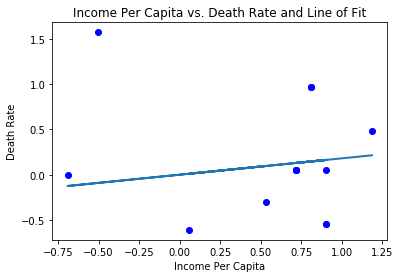

In [197]:
import matplotlib.pyplot as plt

train_prediction = [sum(X_train_sample[i] * w) for i in range(X_train_sample.shape[0])]

#Plotting our points and line of fit (model) 
plt.plot(train_data_sample['IncomePerCapita'], Y_train_sample, 'bo')
plt.plot(train_data_sample['IncomePerCapita'], train_prediction, linewidth=2)
plt.title("Income Per Capita vs. Death Rate and Line of Fit")
plt.xlabel("Income Per Capita")
plt.ylabel("Death Rate")
plt.show()

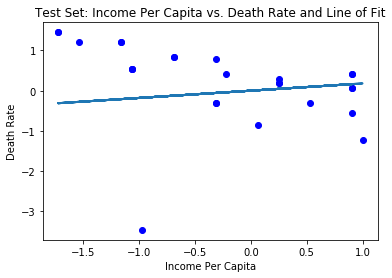

In [198]:
import matplotlib.pyplot as plt

test_prediction = [sum(X_test[i] * w) for i in range(X_test.shape[0])]

#Plotting our points and line of fit (model) 
plt.plot(test_data['IncomePerCapita'], Y_test, 'bo')
plt.plot(test_data['IncomePerCapita'], test_prediction, linewidth=2)
plt.title("Test Set: Income Per Capita vs. Death Rate and Line of Fit")
plt.xlabel("Income Per Capita")
plt.ylabel("Death Rate")
plt.show()

In [199]:
print(w)

[0.18089589 0.53599265]


In [200]:
print("Training sum of squared errors, no regularization:", sum([res**2 for res in Y_train_sample-train_prediction]))
print("Test sum of squared errors, no regularization:", sum([res**2 for res in Y_test-test_prediction]))

Training sum of squared errors, no regularization: 5.807230101589909
Test sum of squared errors, no regularization: 31.500849729717647
